In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
data = pd.read_excel('titanic3.xls')
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [31]:
print(data.shape)
print(data.columns)
print(data.describe())


(1309, 14)
Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1

In [32]:
data = data.drop(['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)

In [33]:
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [34]:
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Length: 1309, dtype: int8

In [35]:
data = data.dropna()
data.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [36]:
data.shape

(1046, 4)

(array([ 51.,  21.,  22.,  40., 114., 160., 128., 122.,  97.,  64.,  51.,
         57.,  38.,  27.,  21.,  20.,   5.,   5.,   2.,   1.]),
 array([ 0.1667  ,  4.158365,  8.15003 , 12.141695, 16.13336 , 20.125025,
        24.11669 , 28.108355, 32.10002 , 36.091685, 40.08335 , 44.075015,
        48.06668 , 52.058345, 56.05001 , 60.041675, 64.03334 , 68.025005,
        72.01667 , 76.008335, 80.      ]),
 <BarContainer object of 20 artists>)

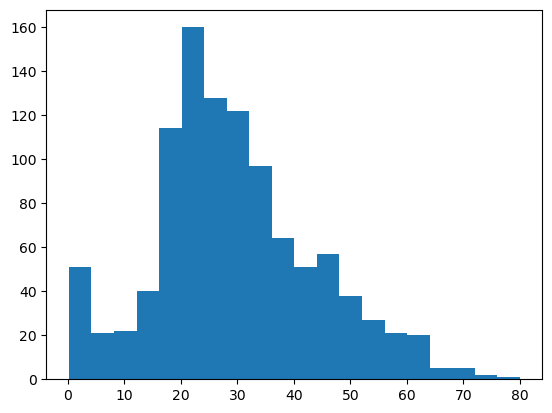

In [37]:
plt.hist(data['age'].dropna(), bins=20)

In [38]:
print(data['sex'].value_counts())

sex
male      658
female    388
Name: count, dtype: int64


In [39]:
print(data['pclass'].value_counts())

pclass
3    501
1    284
2    261
Name: count, dtype: int64


In [40]:
X = data.drop(['survived'], axis=1)
y = data['survived']

print(y.shape)

(1046,)


In [41]:
# split data into training and test sets and validation set 

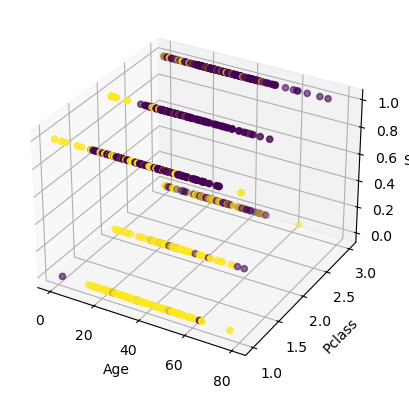

In [42]:
from mpl_toolkits.mplot3d import Axes3D

# Convert 'sex' column to numeric codes
data['sex'] = data['sex'].astype('category').cat.codes

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
ax.scatter(data['age'], data['pclass'], data['sex'], c=data['survived'], cmap='viridis')

# Setting labels
ax.set_xlabel('Age')
ax.set_ylabel('Pclass')
ax.set_zlabel('Sex')

plt.show()

In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Split the temporary set into validation and test sets (50% validation, 50% test of the 20% remaining)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# print(f"Training set: {X_train.shape}, {y_train.shape}")
# print(f"Validation set: {X_val.shape}, {y_val.shape}")
# print(f"Test set: {X_test.shape}, {y_test.shape}")

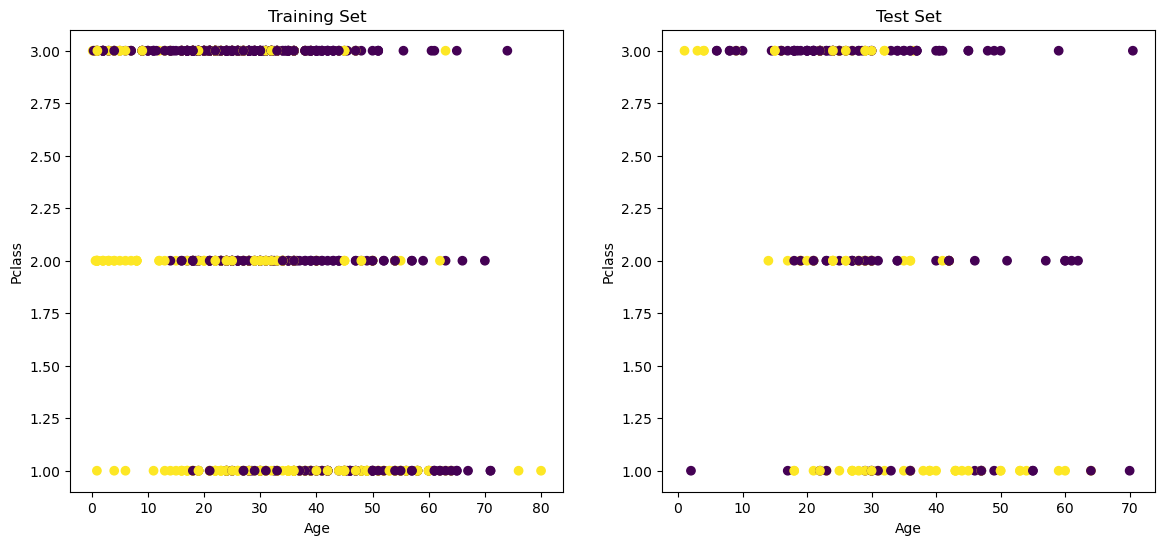

In [44]:
# Convert 'sex' column to numeric codes for plotting
X_train['sex'] = X_train['sex'].astype('category').cat.codes
X_test['sex'] = X_test['sex'].astype('category').cat.codes

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot training set
ax[0].scatter(X_train['age'], X_train['pclass'], c=y_train, cmap='viridis', label='Training set')
ax[0].set_title('Training Set')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Pclass')

# Plot test set
ax[1].scatter(X_test['age'], X_test['pclass'], c=y_test, cmap='viridis', label='Test set')
ax[1].set_title('Test Set')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Pclass')

plt.show()

In [45]:
print("Training set:")
print(X_train.head())
print(y_train.head())

print("\nTest set:")
print(X_test.head())
print(y_test.head())

Training set:
     pclass  sex   age
291       1    0  39.0
393       2    1  25.0
65        1    0  33.0
386       2    1  18.0
424       2    1  30.0
291    1
393    0
65     1
386    0
424    0
Name: survived, dtype: int64

Test set:
      pclass  sex   age
860        3    0  26.0
317        1    1  21.0
688        3    1  29.0
357        2    1  42.0
1259       3    1  36.0
860     1
317     1
688     0
357     0
1259    0
Name: survived, dtype: int64


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8433014354066986

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
cross_val_score(KNeighborsClassifier(4), X_train, y_train, cv=5, scoring="accuracy").mean()

0.7536213287710294

maximum score is :  0.7691901910464785 at k =  4


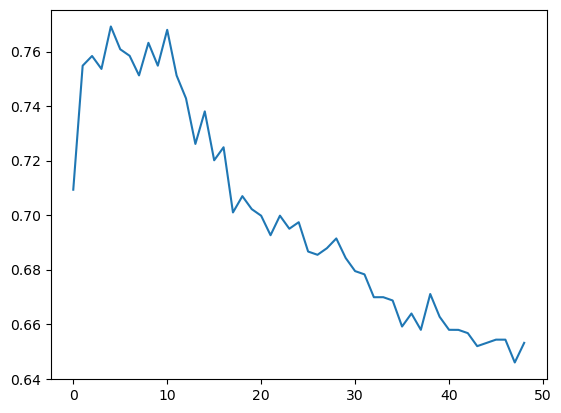

In [50]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)
print("maximum score is : ", max(val_score), "at k = ", val_score.index(max(val_score)))

In [51]:
from sklearn.model_selection import validation_curve

In [52]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(estimator=model, X=X_train, y=y_train, param_name='n_neighbors', param_range=k, cv=5)

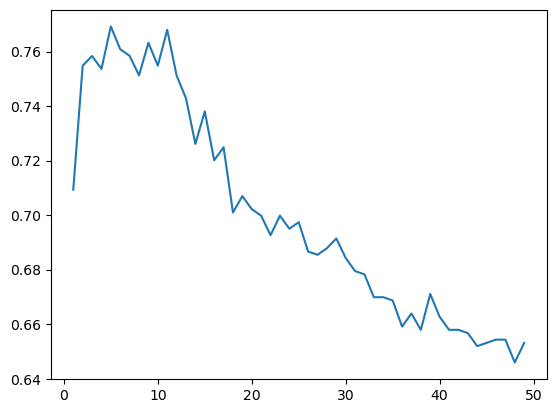

In [53]:
plt.plot(k, val_score.mean(axis=1))

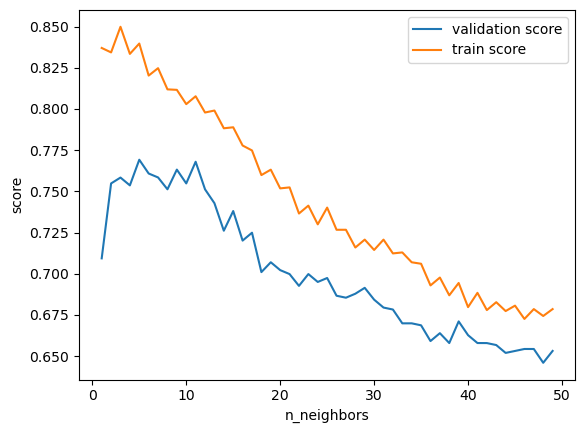

In [54]:
plt.plot(k, val_score.mean(axis=1), label='validation score')
plt.plot(k, train_score.mean(axis=1), label='train score')

plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'n_neighbors': np.arange(1, 50), 'metric': ['euclidean', 'manhattan', 'minkowski']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [59]:
print("Best parameters: ", grid.best_params_)   # {'metric': 'manhattan', 'n_neighbors': 3}
print("Best score: ", grid.best_score_)          # 0.775
print("X_test score: ", grid.score(X_test, y_test))  # 0.775
print("X_train score: ", grid.score(X_train, y_train)) # 0.846 

Best parameters:  {'metric': 'manhattan', 'n_neighbors': 9}
Best score:  0.7871114913031081
X_test score:  0.6857142857142857
X_train score:  0.833732057416268


In [60]:
# save model 
model = grid.best_estimator_
model.score(X_test, y_test)

0.6857142857142857

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[96, 24],
       [42, 48]], dtype=int64)

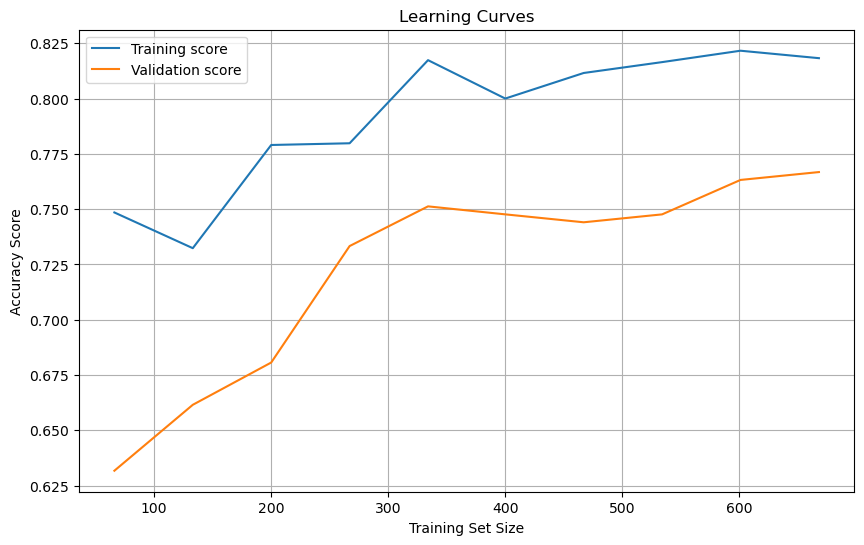

In [62]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='accuracy'
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()